In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
plt.style.use('bmh')

In [4]:
df = pd.read_csv(r'kc_house_data.csv')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
#creating seperate columns for month and year
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).month

In [9]:
df.drop('id',axis=1, inplace= True)

In [10]:
df.shape

(21613, 22)

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

# Exploratory Data Analysis

<Figure size 800x500 with 0 Axes>

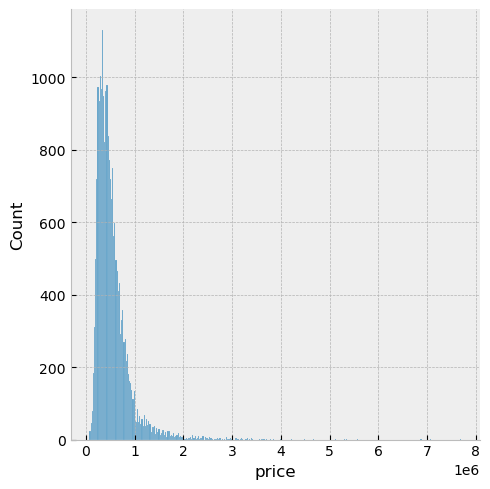

In [13]:
plt.figure(figsize=(8,5))
sns.displot(df['price'])

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

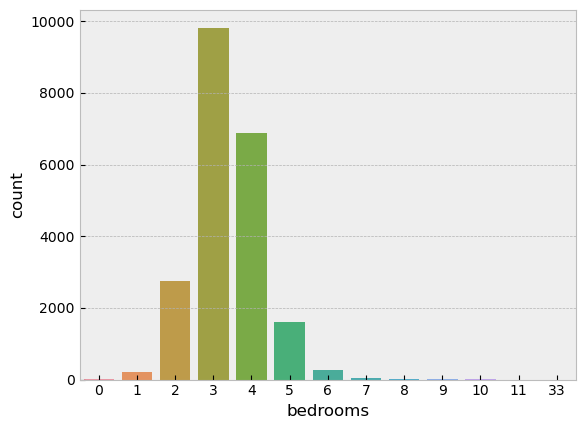

In [14]:
sns.countplot(x='bedrooms', data=df)

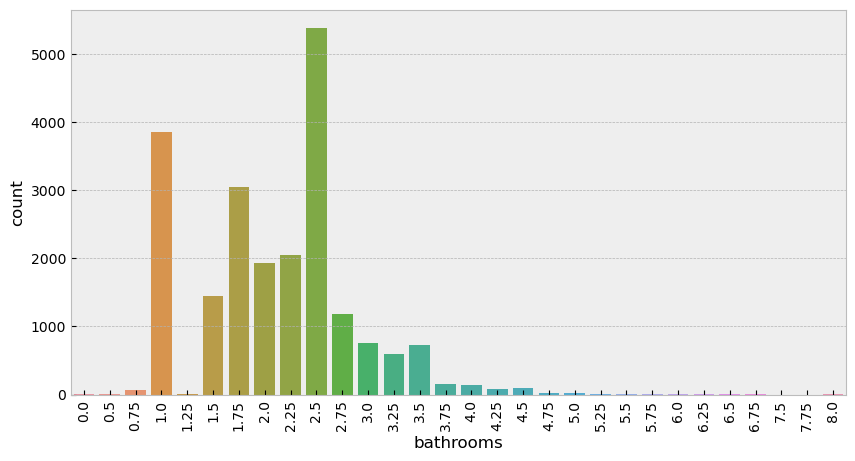

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='bathrooms', data=df)

plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

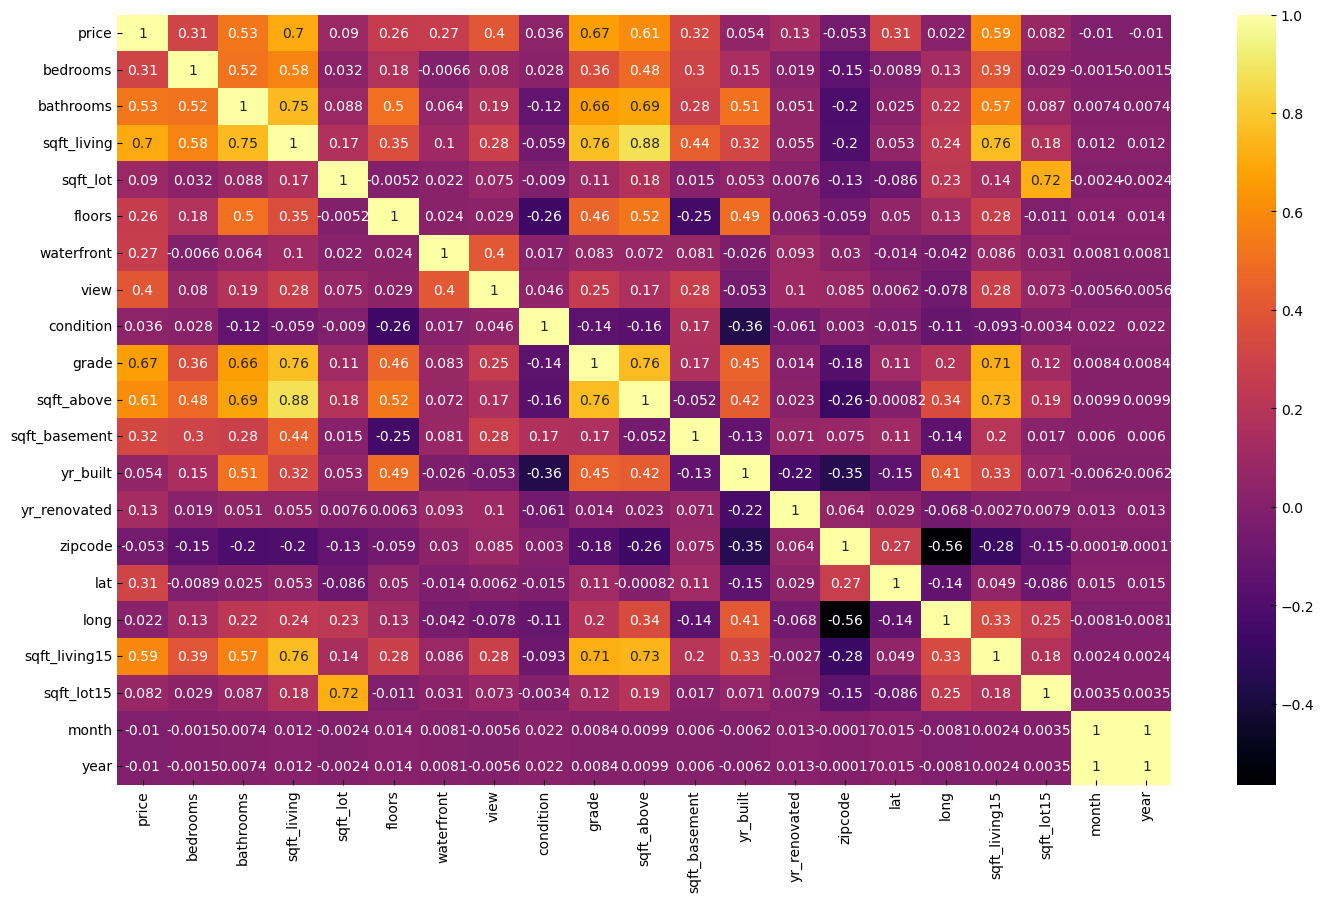

In [16]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),annot=True, cmap='inferno' )

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

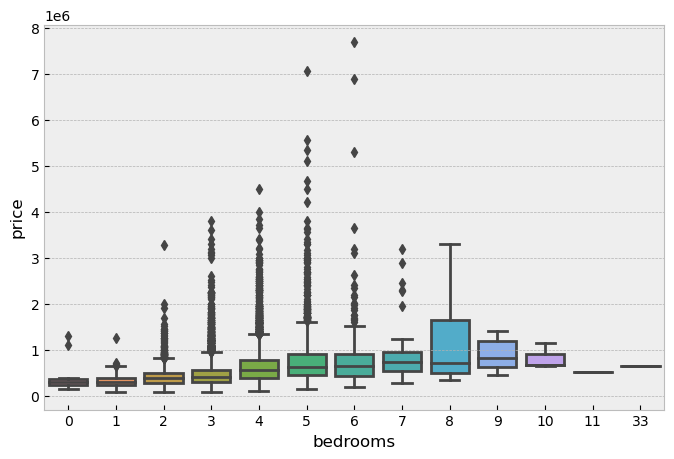

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x='bedrooms', y='price', data=df)

As we can see the number of bedrooms affects the price of house. But there are some cases where lower number of bedrooms lead to high prices. Maybe that has to do with the location of the house.

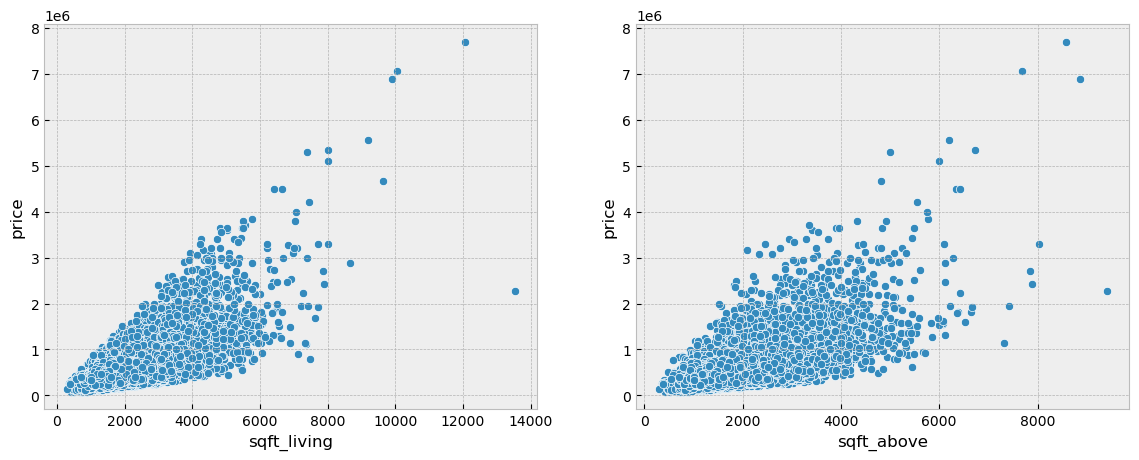

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(x='sqft_living',y='price',data=df, ax=axes[0])
sns.scatterplot(x='sqft_above', y='price',data=df, ax=axes[1])

plt.show()

As we can see the price and the size of a house are positive correlated.

Text(0.5, 0, "Square feet of neighborhood's houses")

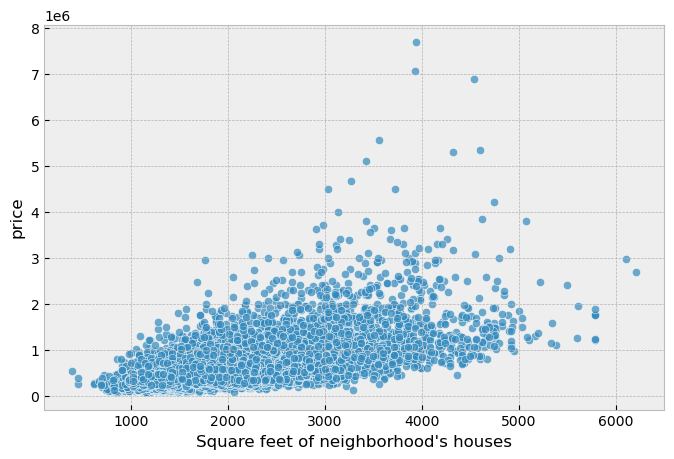

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='sqft_living15', y='price', data=df, alpha=0.7)

plt.xlabel('Square feet of neighborhood\'s houses')

The price of a house is also affected by the size of the neighborhood's houses.

<AxesSubplot:xlabel='price', ylabel='lat'>

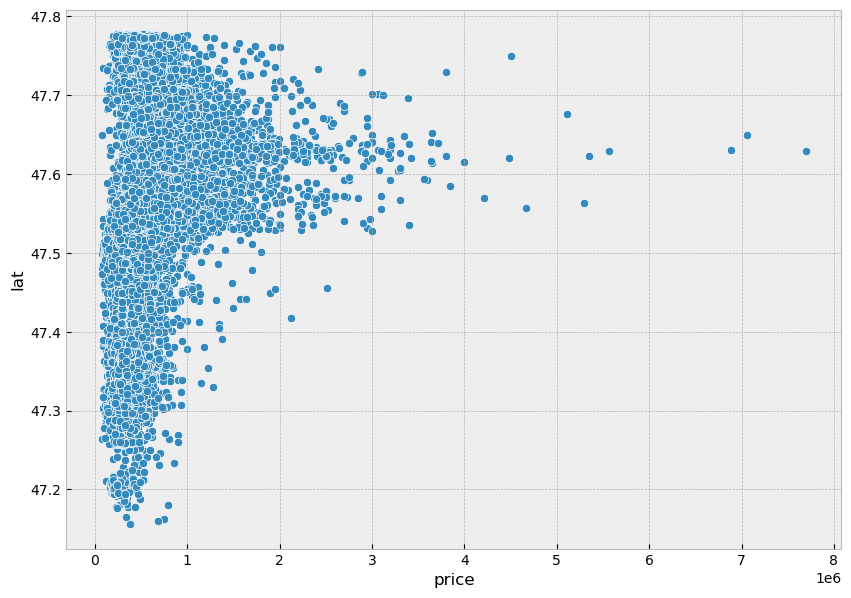

In [20]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='price', y='lat', data=df)

<AxesSubplot:xlabel='price', ylabel='long'>

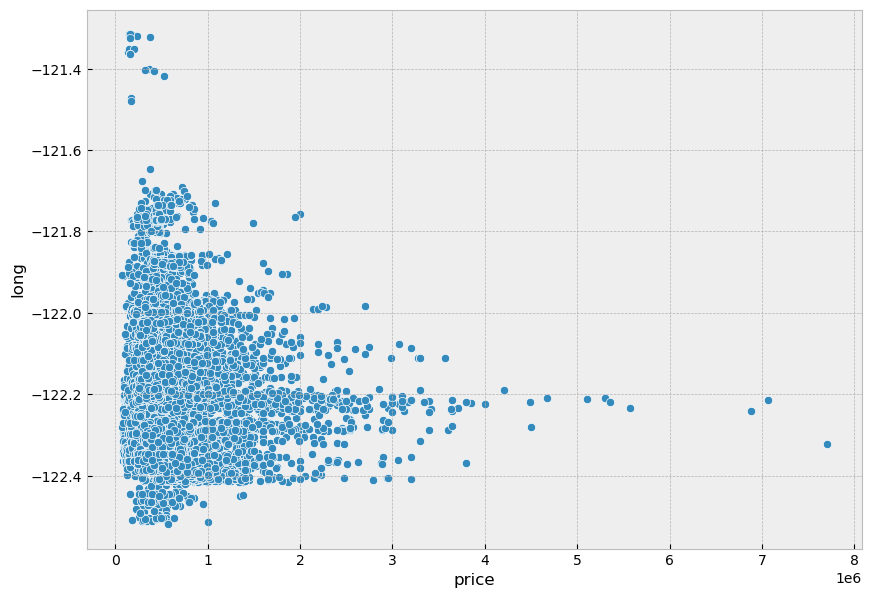

In [21]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='price', y='long', data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

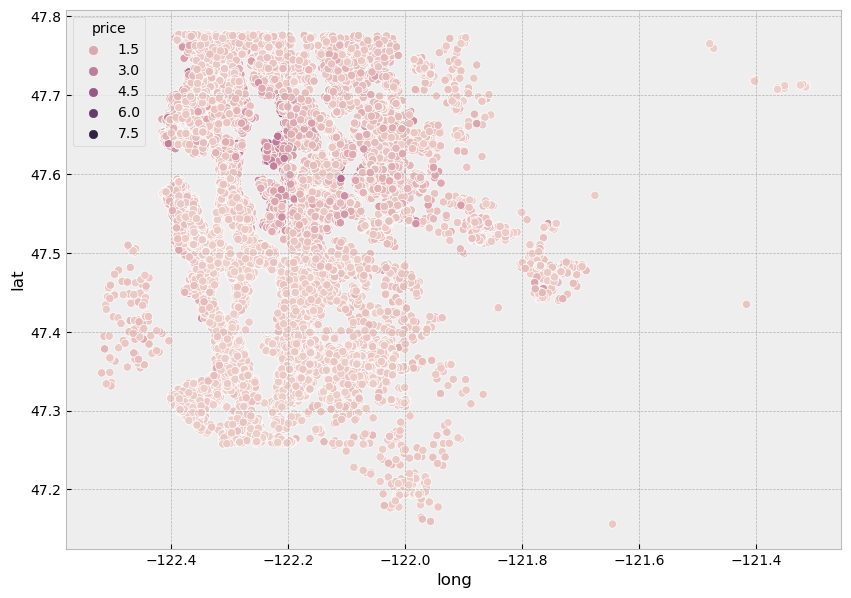

In [22]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='long', y='lat', data=df, hue='price')

In [33]:
len(df)*0.01

216.13

<AxesSubplot:xlabel='long', ylabel='lat'>

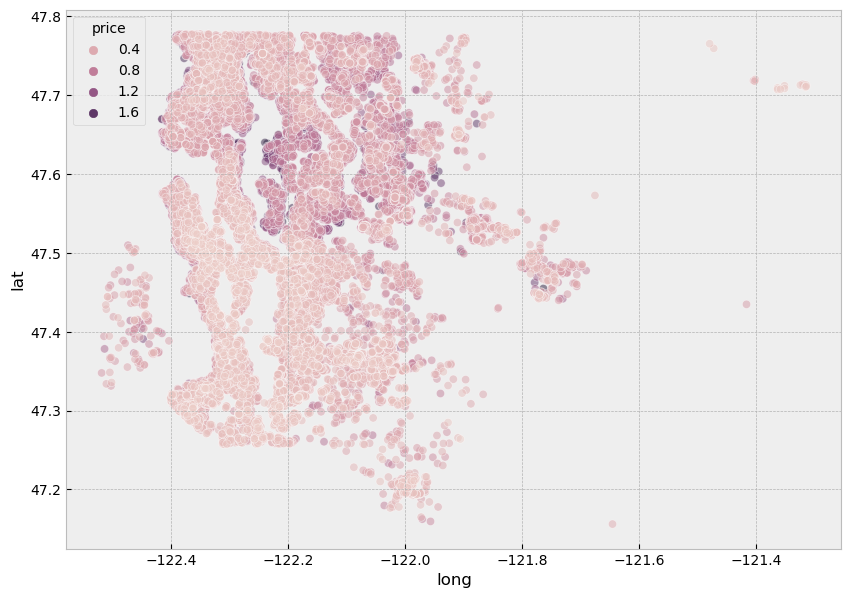

In [36]:
non_top_1perc = df.sort_values('price',ascending=False).iloc[216:]

plt.figure(figsize=(10,7))
sns.scatterplot(x='long', y='lat', data=non_top_1perc, hue='price', alpha=0.5)

As we can see the location of the house plays an important role to house pricing. Houses that are located next to the see or lake usually cost more than the others.

<AxesSubplot:xlabel='grade', ylabel='price'>

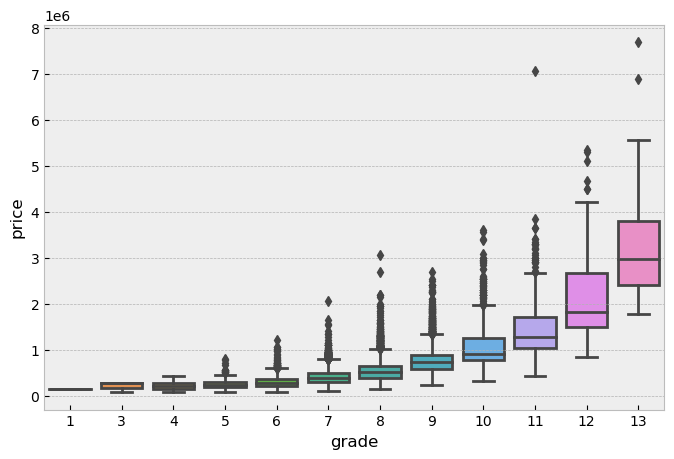

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x='grade', y='price',data=df)

In [26]:
df.waterfront.unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

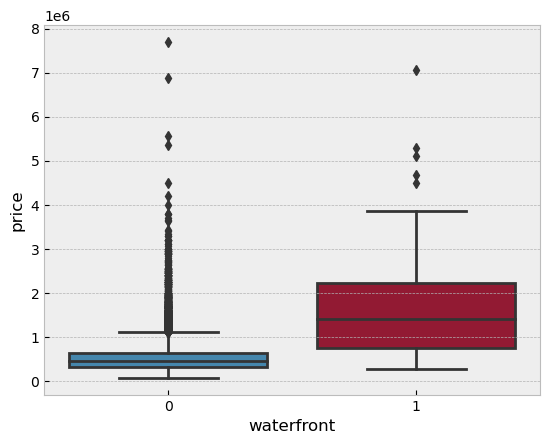

In [27]:
sns.boxplot(x='waterfront', y='price', data=df)

In [30]:
df['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

In [31]:
df['view'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

<AxesSubplot:xlabel='view', ylabel='price'>

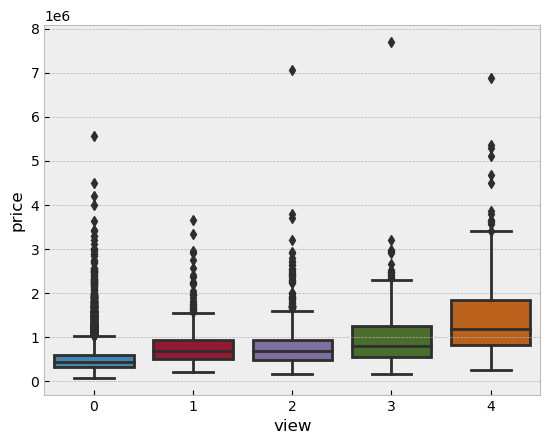

In [32]:
sns.boxplot(x='view', y='price', data=df)

<AxesSubplot:xlabel='month'>

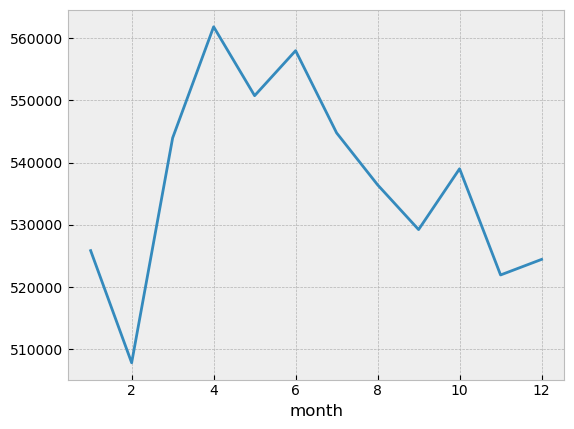

In [37]:
df.groupby('month')['price'].mean().plot()

In [39]:
df.drop('zipcode', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)

In [40]:
df.to_csv('house.csv')